In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data=[[3,1.5,1],[2,1,0],[4,1.5,1],[3,1,0],[3.5,0.5,1],[2,0.5,0],[5.5,1,1],[1,1,0]]
mystery_flower=[4.5,1]

In [3]:
def sigmoid(X):
    return 1/(1+np.exp(-X))
def sigmoid_P(x):
    return sigmoid(x)*(1-sigmoid(x))

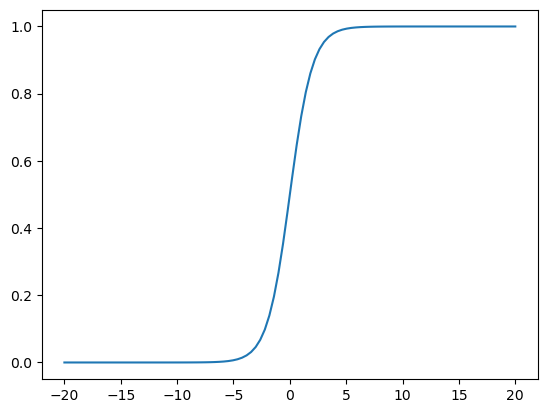

In [4]:
T=np.linspace(-20,20,100)
Y=sigmoid(T)
plt.plot(T,Y)

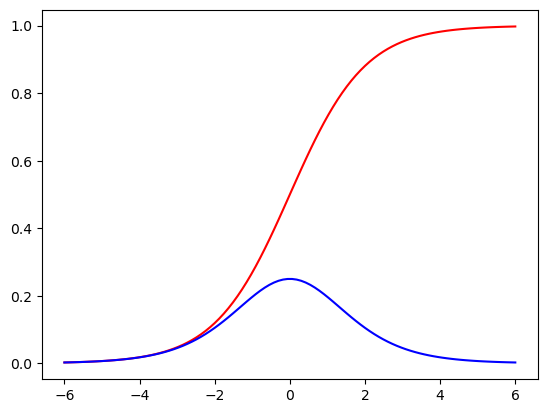

In [5]:
T=np.linspace(-6,6,100)
plt.plot(T,sigmoid(T),c='r')
plt.plot(T,sigmoid_P(T),c='b')

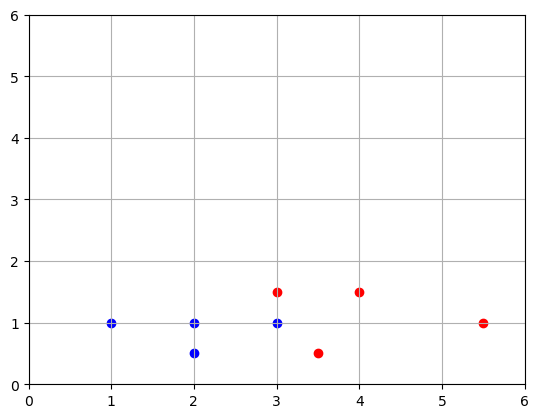

In [6]:
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
    point=data[i]
    color="r"
    if point[2]==0:
        color="b"
    plt.scatter(point[0],point[1],c=color)

In [7]:
learning_rate=0.3
costs=[]
w1=np.random.randn()
w2=np.random.randn()
b=np.random.randn()

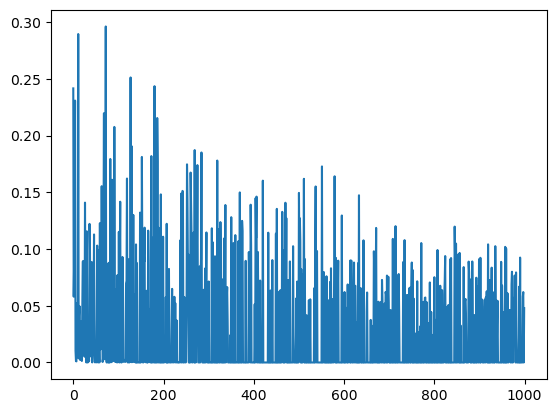

In [8]:
for i in range(100000):
    ri=np.random.randint(len(data))
    point=data[ri]
    z=point[0]*w1+point[1]*w2+b
    pred=sigmoid(z)
    target=point[2]
    cost=np.square(pred-target)
    dcost_pred=2*(pred-target)
    dpred_dz=sigmoid_P(z)*(1-sigmoid(z))
    dz_dw1=point[0]
    dz_dw2=point[1]
    dz_db=1
    dcost_dz=dcost_pred*dpred_dz
    dcost_dw1=dcost_dz*dz_dw1
    dcost_dw2=dcost_dz*dz_dw2
    dcost_db=dcost_dz*dz_db
    w1=w1-learning_rate*dcost_dw1
    w2=w2-learning_rate*dcost_dw2
    b=b-learning_rate*dcost_db
    if i%100==0:
        cost_sum=0
        for j in range(len(data)):
            point=data[ri]
            z=point[0]*w1+point[1]*w2+b
            pred=sigmoid(z)
            target=point[2]
            cost_sum+=np.square(pred-target)
        costs.append(cost_sum/len(data))
plt.plot(costs)

In [9]:
print(w1)
print(w2)
print(b)

8.366652632776344
4.037938446306074
-30.338896614355065


In [10]:
for i in range(len(data)):
    point=data[i]
    print(point)
    z=point[0]*w1+point[1]*w2+b
    pred=sigmoid(z)
    print("pred:{}".format(pred))

[3, 1.5, 1]
pred:0.6938050352924332
[2, 1, 0]
pred:6.995048975104913e-05
[4, 1.5, 1]
pred:0.9998974052900175
[3, 1, 0]
pred:0.23129732187548693
[3.5, 0.5, 1]
pred:0.723793393479836
[2, 0.5, 0]
pred:9.289448097475294e-06
[5.5, 1, 1]
pred:0.999999997260886
[1, 1, 0]
pred:1.6264100984849484e-08


In [11]:
z=mystery_flower[0]*w1+mystery_flower[1]*w2+b
pred=sigmoid(z)
pred

0.9999882186226154

In [12]:
def which_flower(length,width):
    z=length*w1+width*w2+b
    print(z)
    pred=sigmoid(z)
    if pred<0.5:
        print("blue")
    else:
        print("red")

In [13]:
which_flower(0.5,1)

-22.117631851660818
blue


In [14]:
which_flower(4.5,1)

11.348978679444556
red


In [15]:
import os

In [16]:
from gtts import gTTS
tts=gTTS(text='紅色',lang='zh-TW')
tts.save('red.mp3')
tts=gTTS(text='藍色',lang='zh-TW')
tts.save('blue.mp3')

In [17]:
def which_flower(length,width):
    z=length*w1+width*w2+b
    print(z)
    pred=sigmoid(z)
    if pred<0.5:
        os.system("blue.mp3")
    else:
        os.system("red.mp3")

In [18]:
which_flower(4.5,1)

11.348978679444556


In [19]:
which_flower(0.5,1)

-22.117631851660818
